In [1]:
# %matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Parte 1

In [13]:
def cromaticas(img):
    '''
    Devuelve la imagen original aplicando el algoritmo para 
    pasar a coordenadas cromáticas normalizado a la suma de
    intensidades de los canales
    Hay que hacer algo para cuando la suma de las intensidades en
    los canales da 0
    '''

    # calculo el denominador (suma de todos los canales)
    imagen = img.astype(int)
    suma = (imagen[:,:,0] + imagen[:,:,1] + imagen[:,:,2])
    # Cuando la suma es 0. Lo convierto a 1 para poder dividir.
    mask = suma == 0
    suma = suma + mask
    result = np.zeros(img.shape)
    for i in range(3):
        result[:,:,i] = np.round(imagen[:,:,i] * imagen[:,:,i] / suma)
        result = result.astype('uint8')
    return result

In [3]:
def white_patch(img):
    '''
    Devuelve la imagen original aplicando el algoritmo White Patch
    Normalizado al color de la luz blanca puro (255, 255, 255)
    '''
    result = np.zeros(img.shape)
    for i in range(3):
        result[:,:,i] = np.round(255/img[:,:,i].max()*img[:,:,i])
        result = result.astype('uint8')
    return result

### Pruebas

In [59]:
def plotear(imagen):

    '''
    Funcion para generar ploteos varios
    de una imagen y sus derivadas al 
    ser procesadas
    '''
    # Cargar una imagen
    img = cv.imread(imagen, cv.IMREAD_COLOR)
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # Muestro las imagenes

    # original
    ax1=plt.subplot(311)
    ax1.imshow(imgRGB,  vmin=0, vmax=255)
    ax1.set_title('Original')

    # aplicando cromaticas
    ax1=plt.subplot(324)
    ax1.imshow(cromaticas(imgRGB),  vmin=0, vmax=255)
    ax1.set_title('cromaticas')

    # Aplicando White Patch
    ax1=plt.subplot(323)
    ax1.imshow(white_patch(imgRGB),  vmin=0, vmax=255)
    ax1.set_title('white-patch')

    # Aplicando White-Patch luego cromaticas
    ax1=plt.subplot(326)
    ax1.imshow(cromaticas(white_patch(imgRGB)),  vmin=0, vmax=255)
    ax1.set_title('white-patch+Cromaticas')

    # Aplicando cromáticas luego White-Patch
    ax1=plt.subplot(325)
    ax1.imshow(white_patch(cromaticas(imgRGB)),  vmin=0, vmax=255)
    ax1.set_title('Cromaticas+white-patch')

    plt.plot()


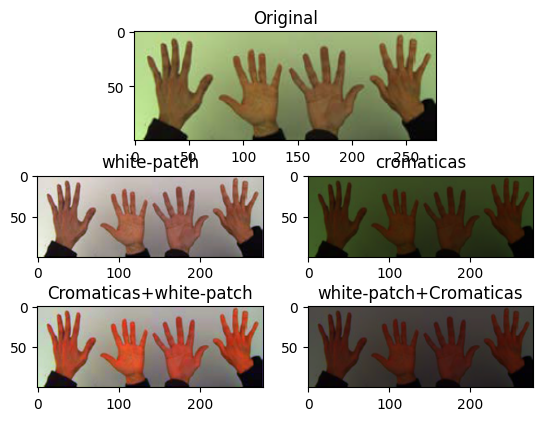

In [61]:
plotear('white_patch/test_green.png')

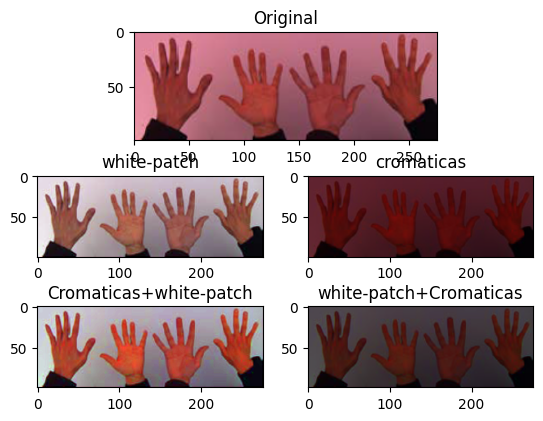

In [62]:
plotear('white_patch/test_red.png')

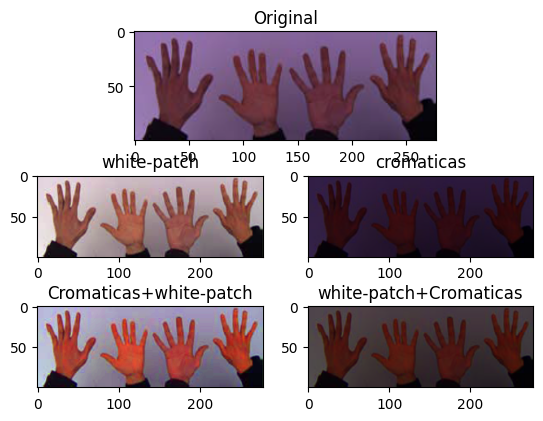

In [63]:
plotear('white_patch/test_blue.png')